In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Source folder path in Google Drive
source_folder = '/content/drive/My Drive/car'

# Destination folder path in Colab environment
destination_folder = '/content/car'

# Copy the folder
shutil.copytree(source_folder, destination_folder)

'/content/car'

In [ ]:
!nvidia-smi

Fri Jul 12 11:08:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
from IPython.display import display, Image

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.5/78.2 GB disk)


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/car/data.yaml epochs=100 imgsz=640 batch=-1 optimizer=RAdam

100% 21.5M/21.5M [00:00<00:00, 178MB/s]
Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/car/data.yaml, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=RAdam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/car/data.yaml

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131776 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/car/valid/labels.cache... 160 images, 1 backgrounds, 0 corrupt: 100% 160/160 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:10<00:00,  1.02s/it]
                   all        160       1055      0.712      0.687      0.716      0.542
                  boot         35         39      0.557       0.59      0.556      0.444
                   car        142        145      0.924      0.979      0.956      0.895
                  door         50         52      0.795      0.745      0.828      0.623
          front_bumper         30         30      0.575      0.367      0.431      0.279
           front_grill         49         51      0.558      0.686      0.625      0.522
      front_windshield         54         56      0.941

In [ ]:
import os

model_path = '/content/runs/detect/train/weights/best.pt'
if os.path.exists(model_path):
    print("Model file found.")
else:
    print("Model file not found.")


Model file found.


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/car/test/images save=true

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131776 parameters, 0 gradients, 28.5 GFLOPs

image 1/22 /content/car/test/images/Cars212_png.rf.c31b66dbfb5e4d5bc2e10f4b331f03aa.jpg: 640x640 1 license_plate, 16.4ms
image 2/22 /content/car/test/images/Cars260_png.rf.358fc27422dbe6062fced88e7e5b59cc.jpg: 640x640 1 car, 1 license_plate, 16.4ms
image 3/22 /content/car/test/images/Cars295_png.rf.5452c67121f3be7c3e37148a9cc4936d.jpg: 640x640 2 cars, 2 license_plates, 16.4ms
image 4/22 /content/car/test/images/Cars304_png.rf.f31408152fe09e73a74c2949a65058a0.jpg: 640x640 2 headlamps, 2 license_plates, 1 wheel, 16.4ms
image 5/22 /content/car/test/images/Cars306_png.rf.dd001ad2f0e6c305bf5bd3d704eebd75.jpg: 640x640 1 car, 2 front_grills, 1 front_windshield, 1 headlamp, 1 license_plate, 2 sideview_mirrors, 16.4ms
image 6/22 /content/car/test/images/Cars343_png.rf.1faf32b05c2b6bb56b93e41b49b56db9.jpg: 640x640 1 car, 1 licens

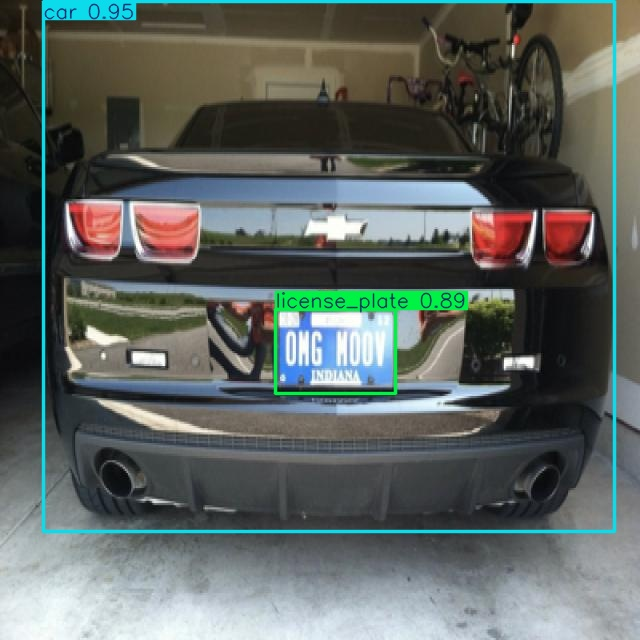

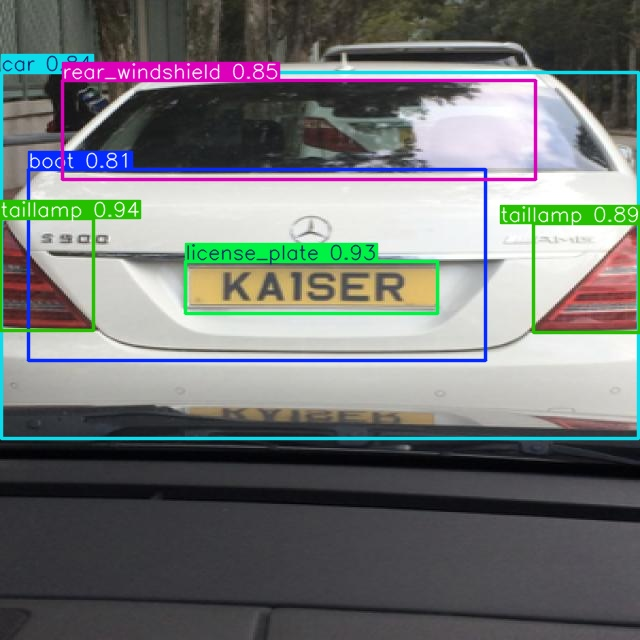

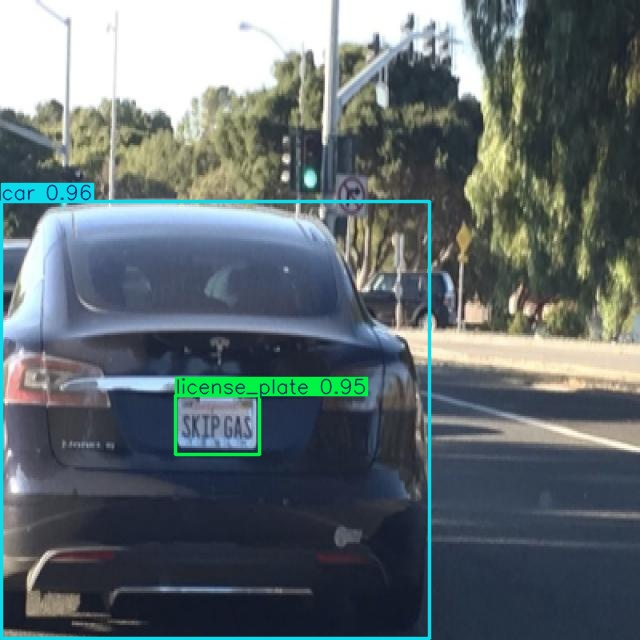

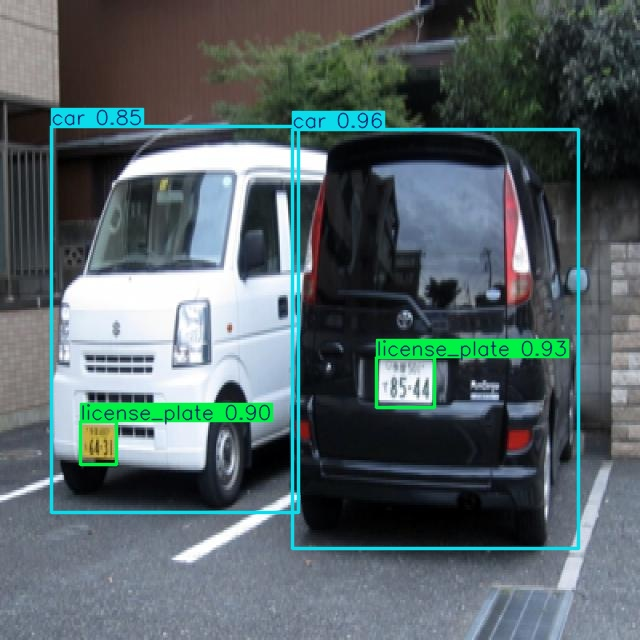

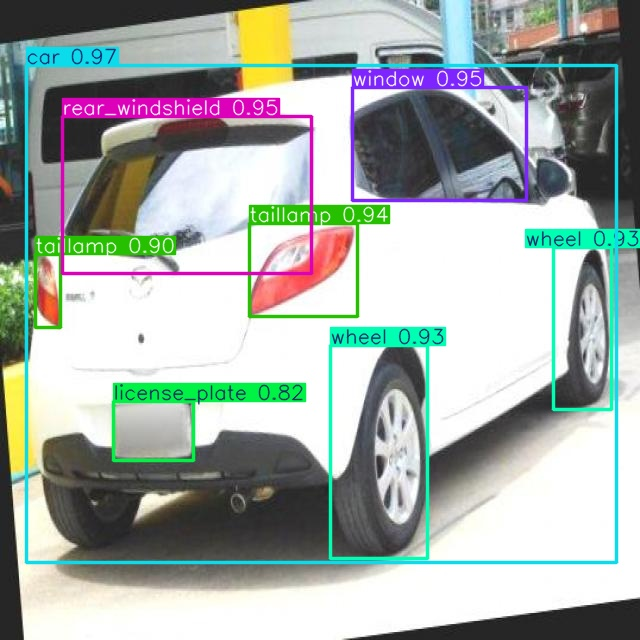

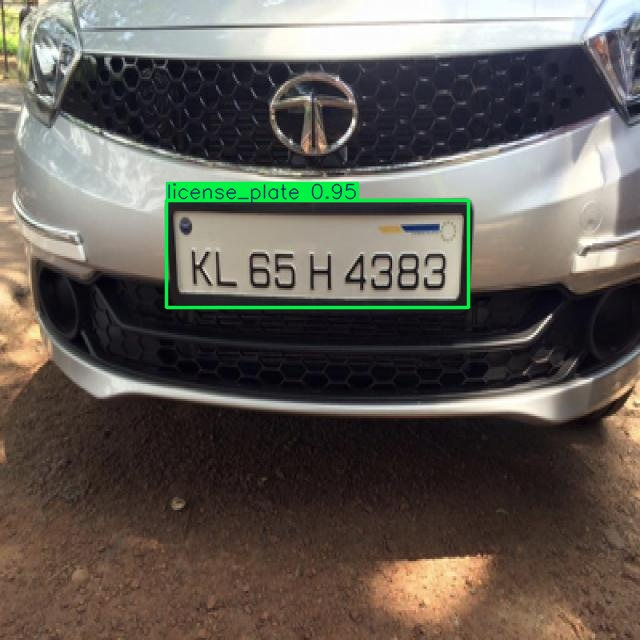

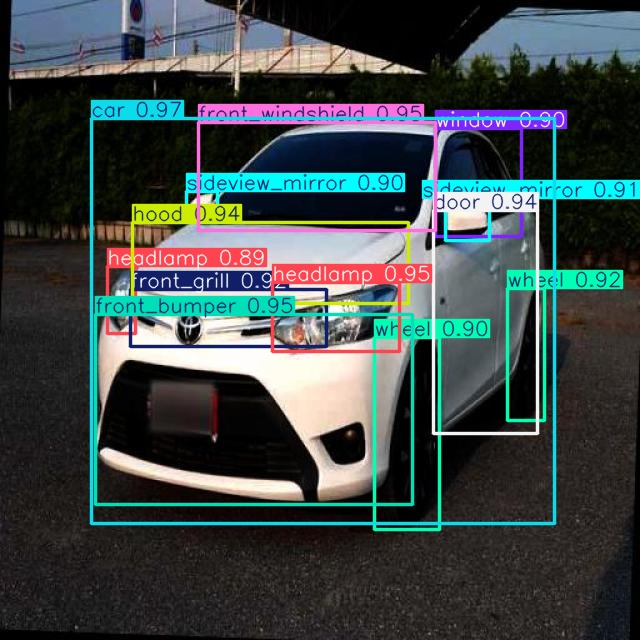

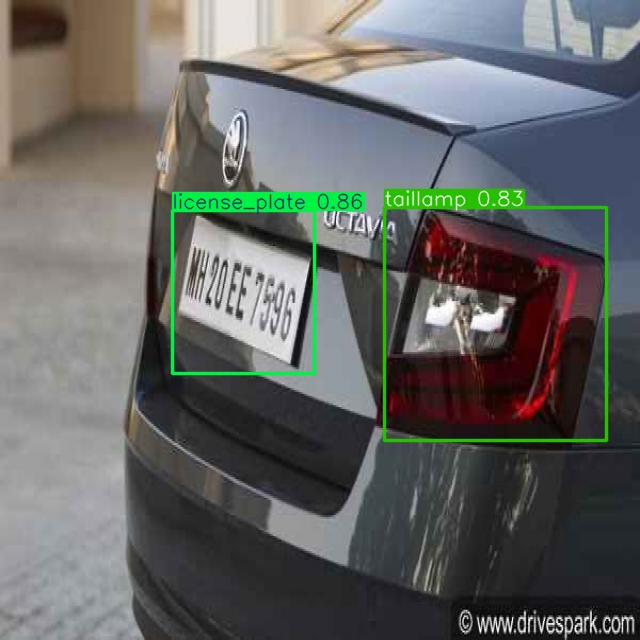

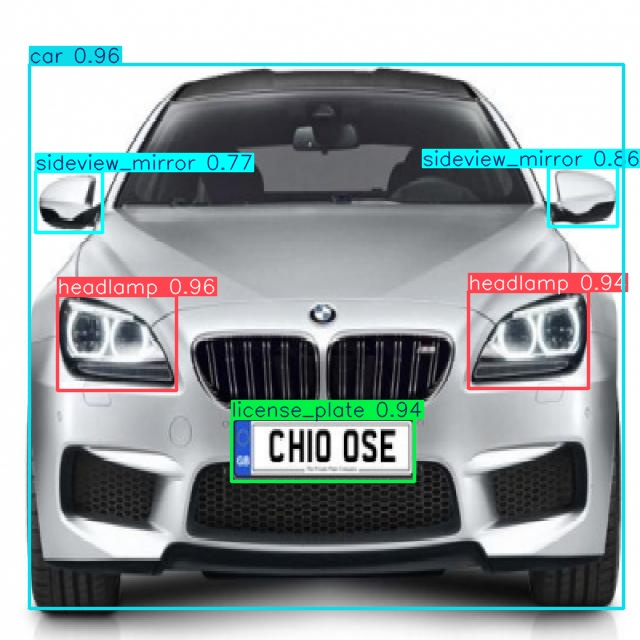

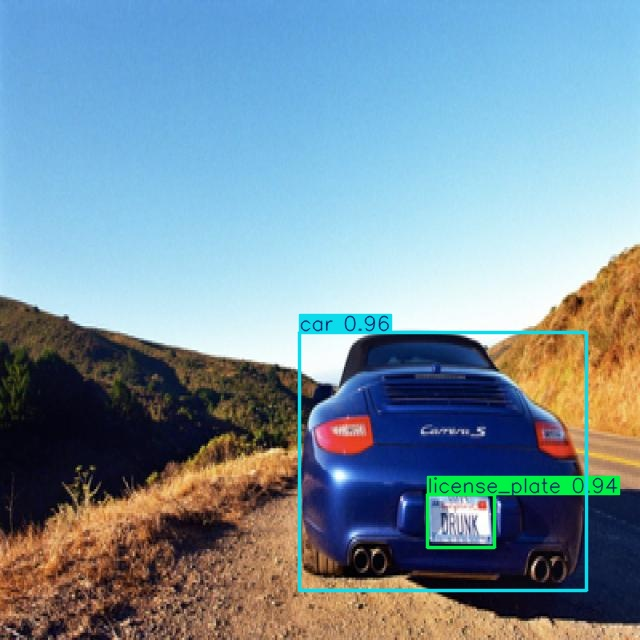

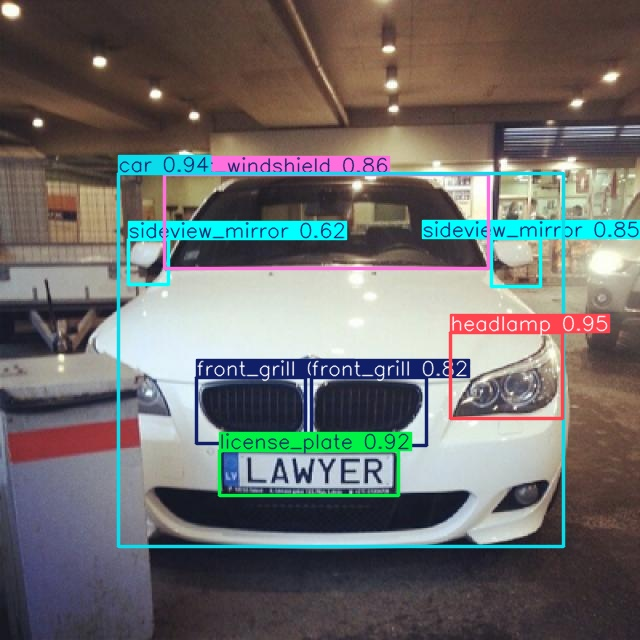

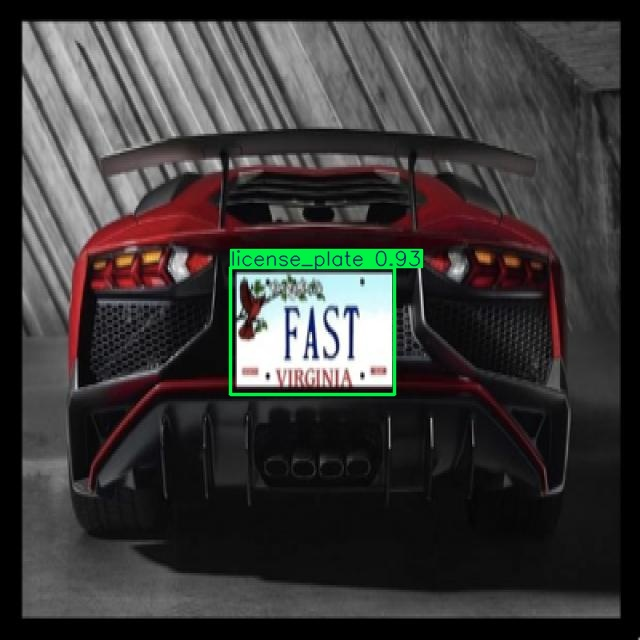

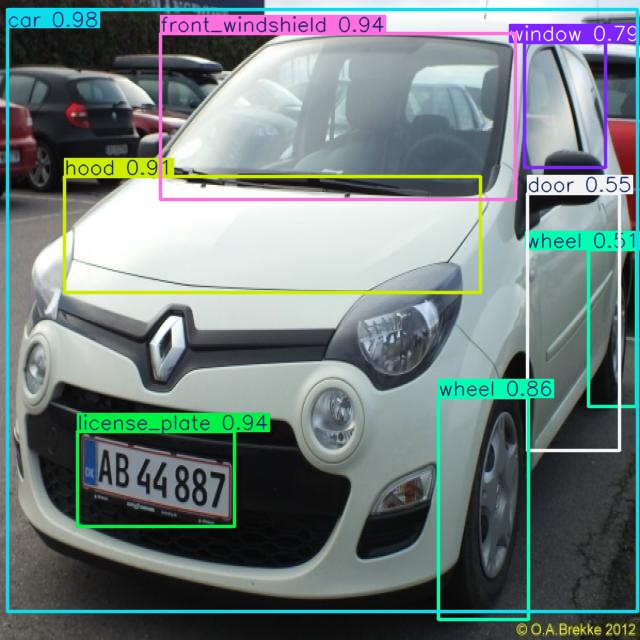

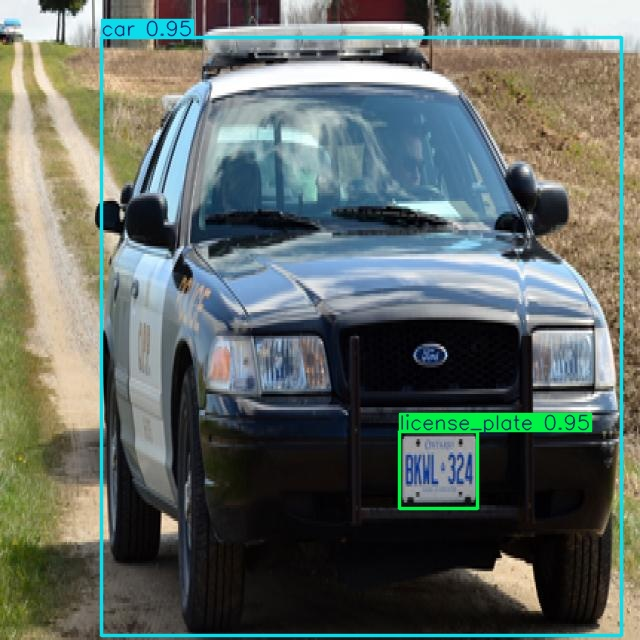

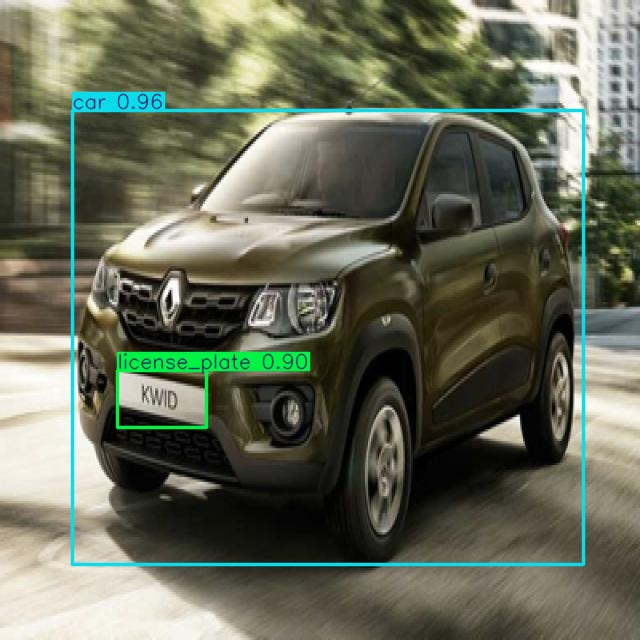

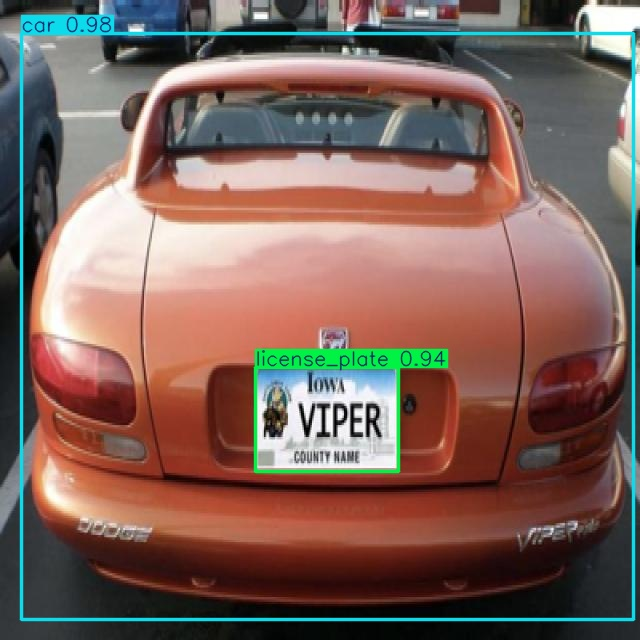

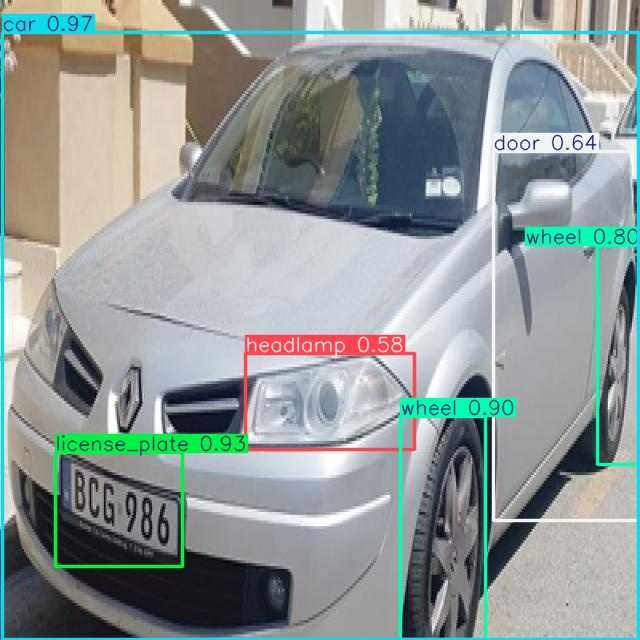

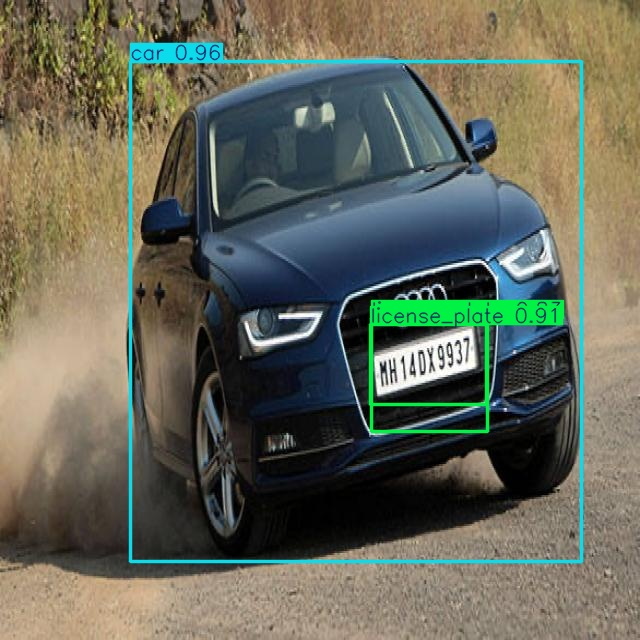

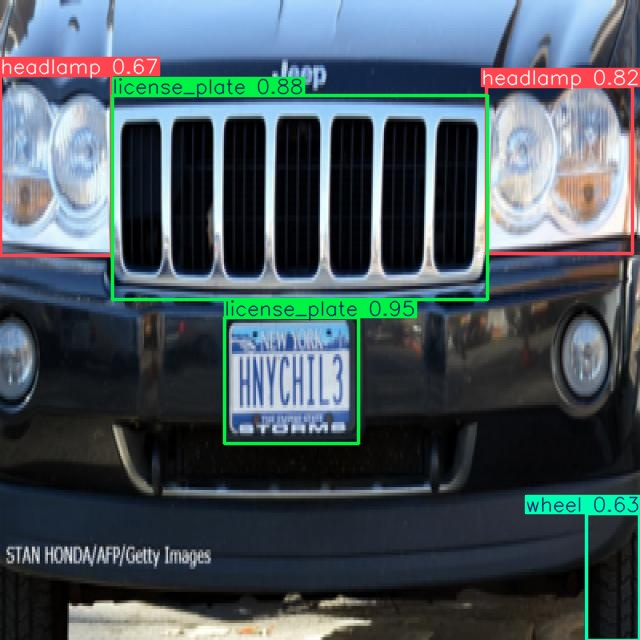

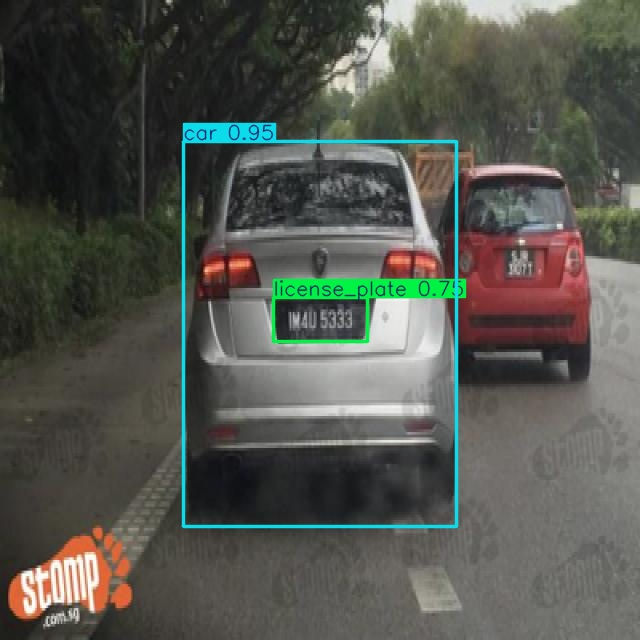

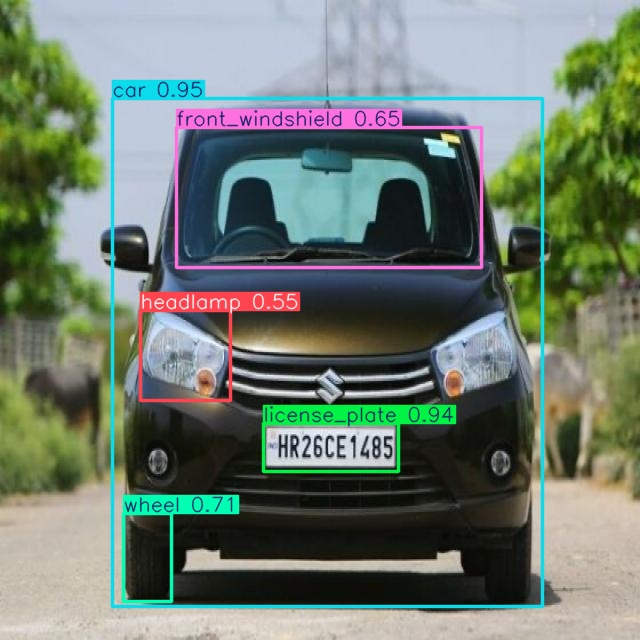

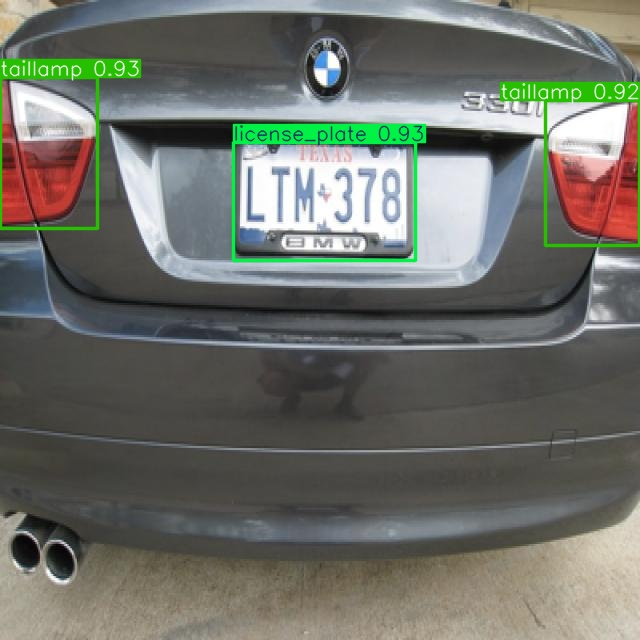

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

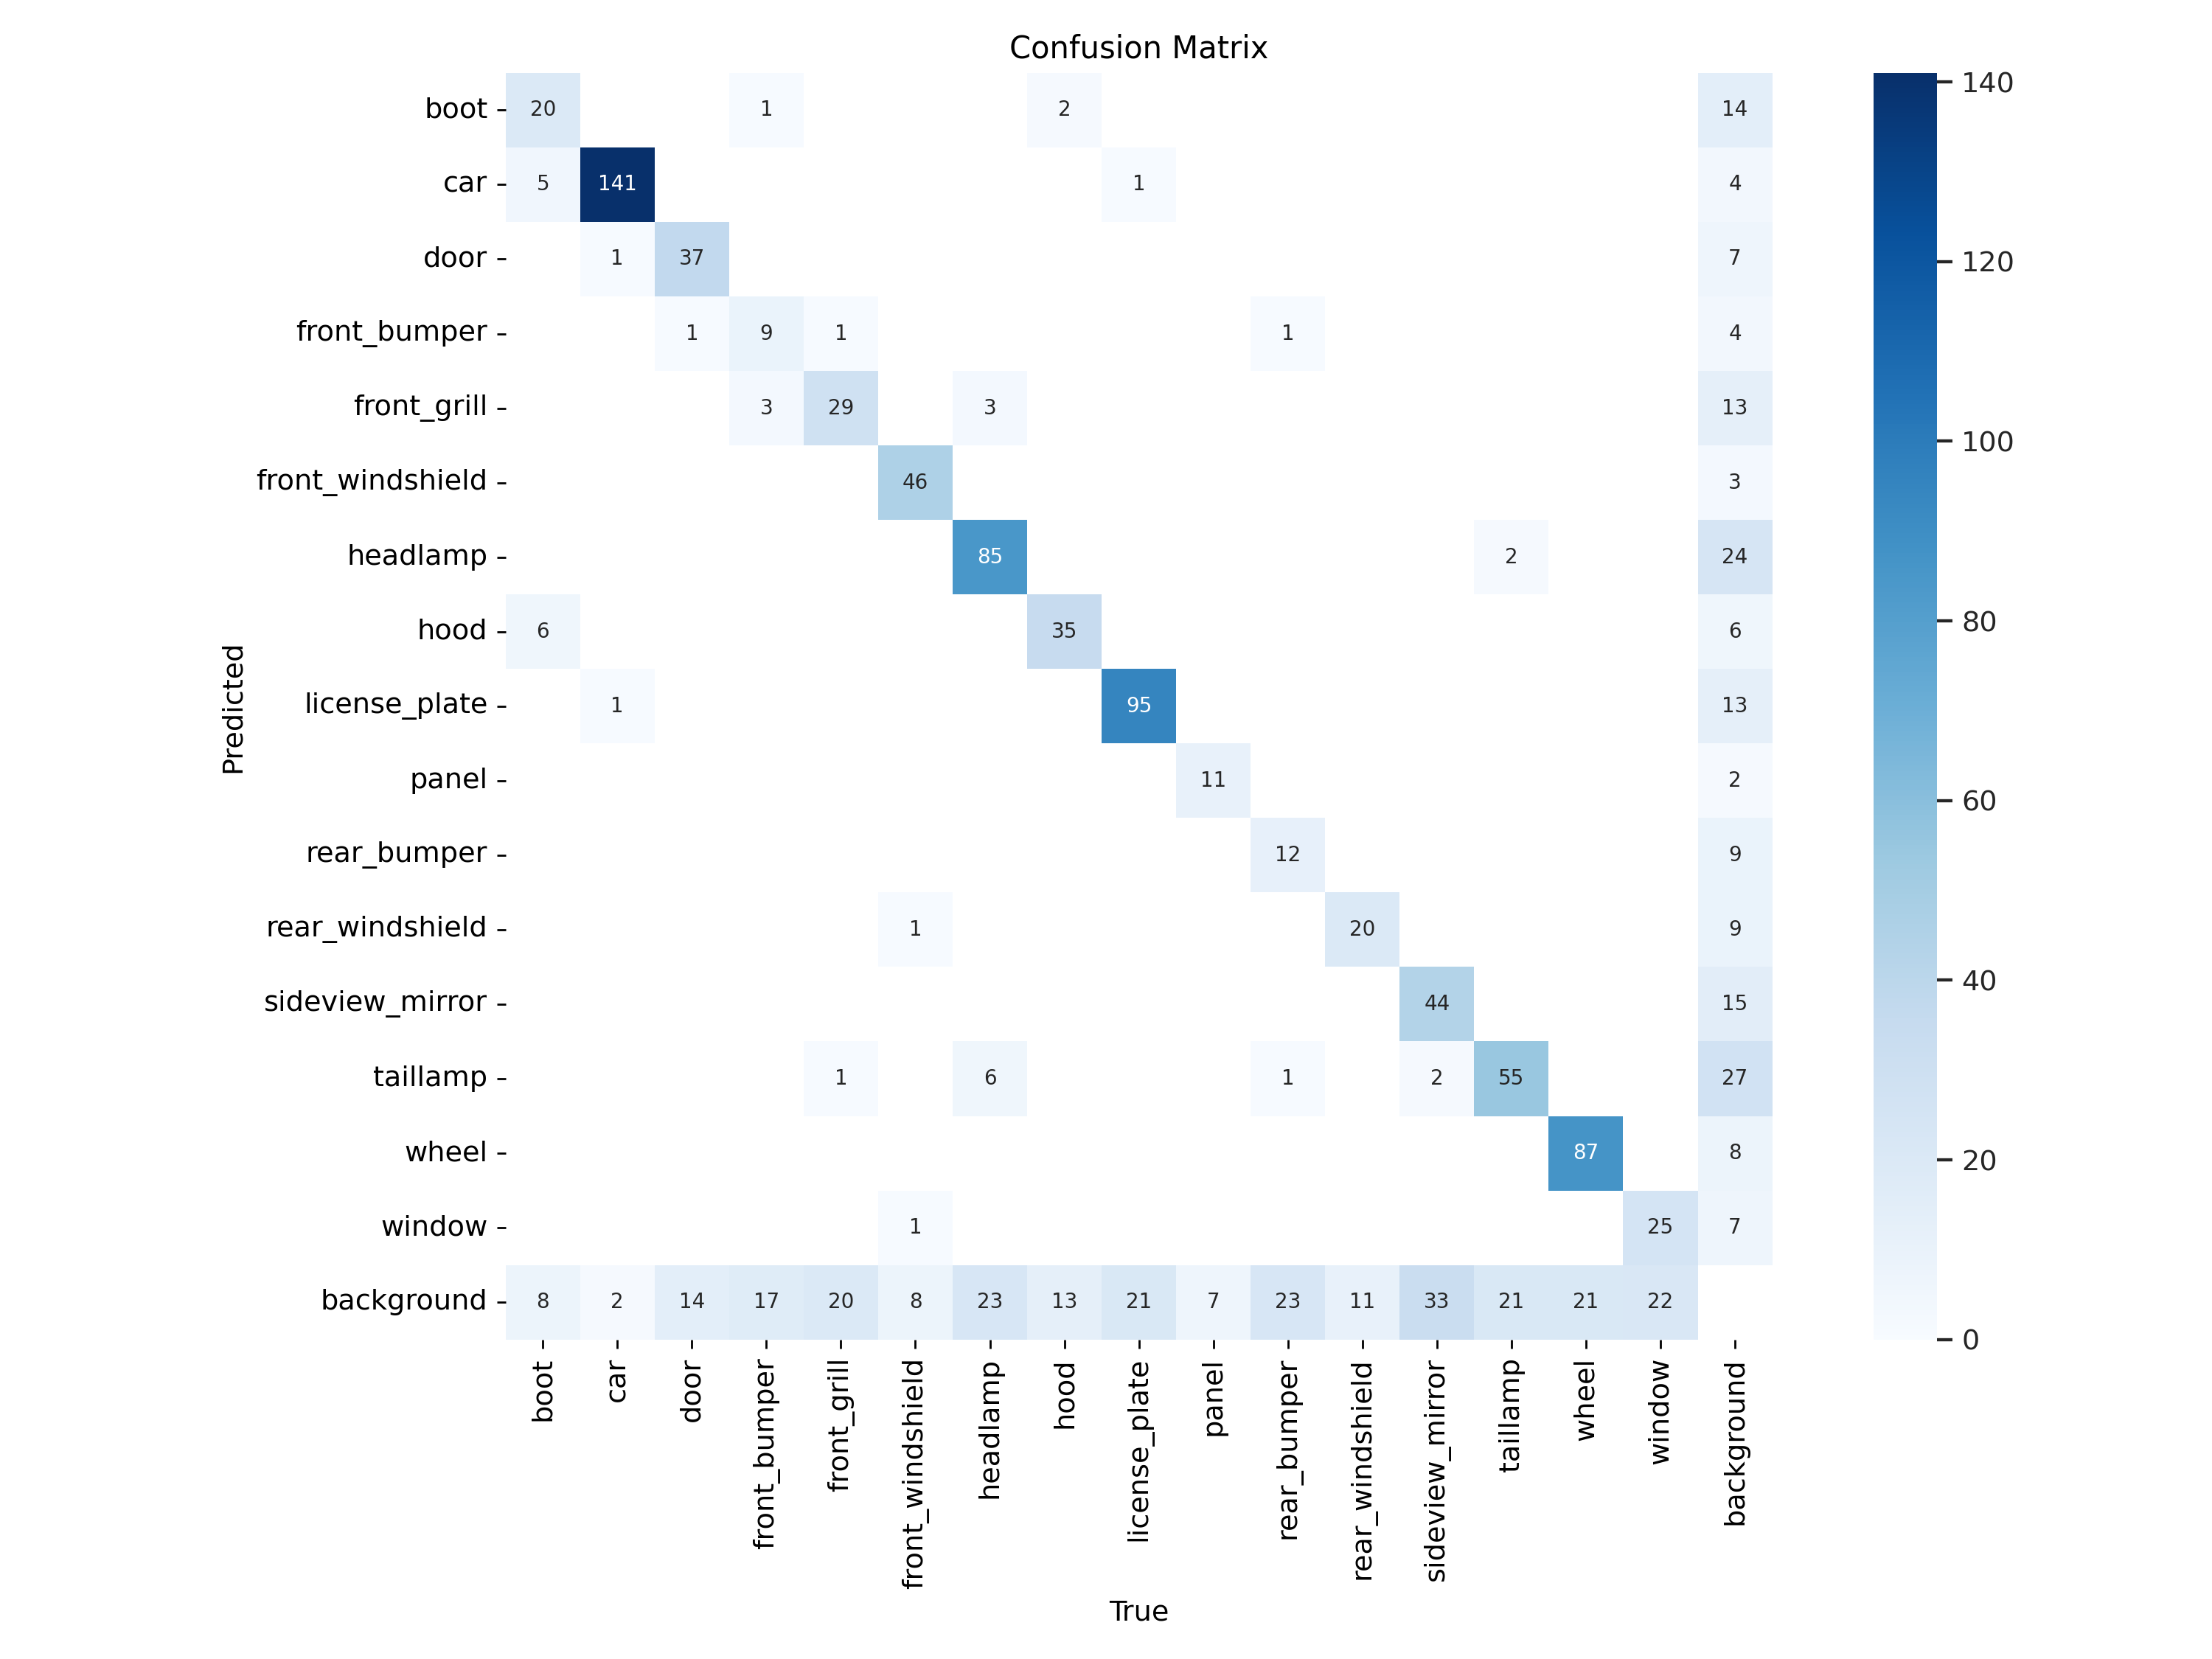

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

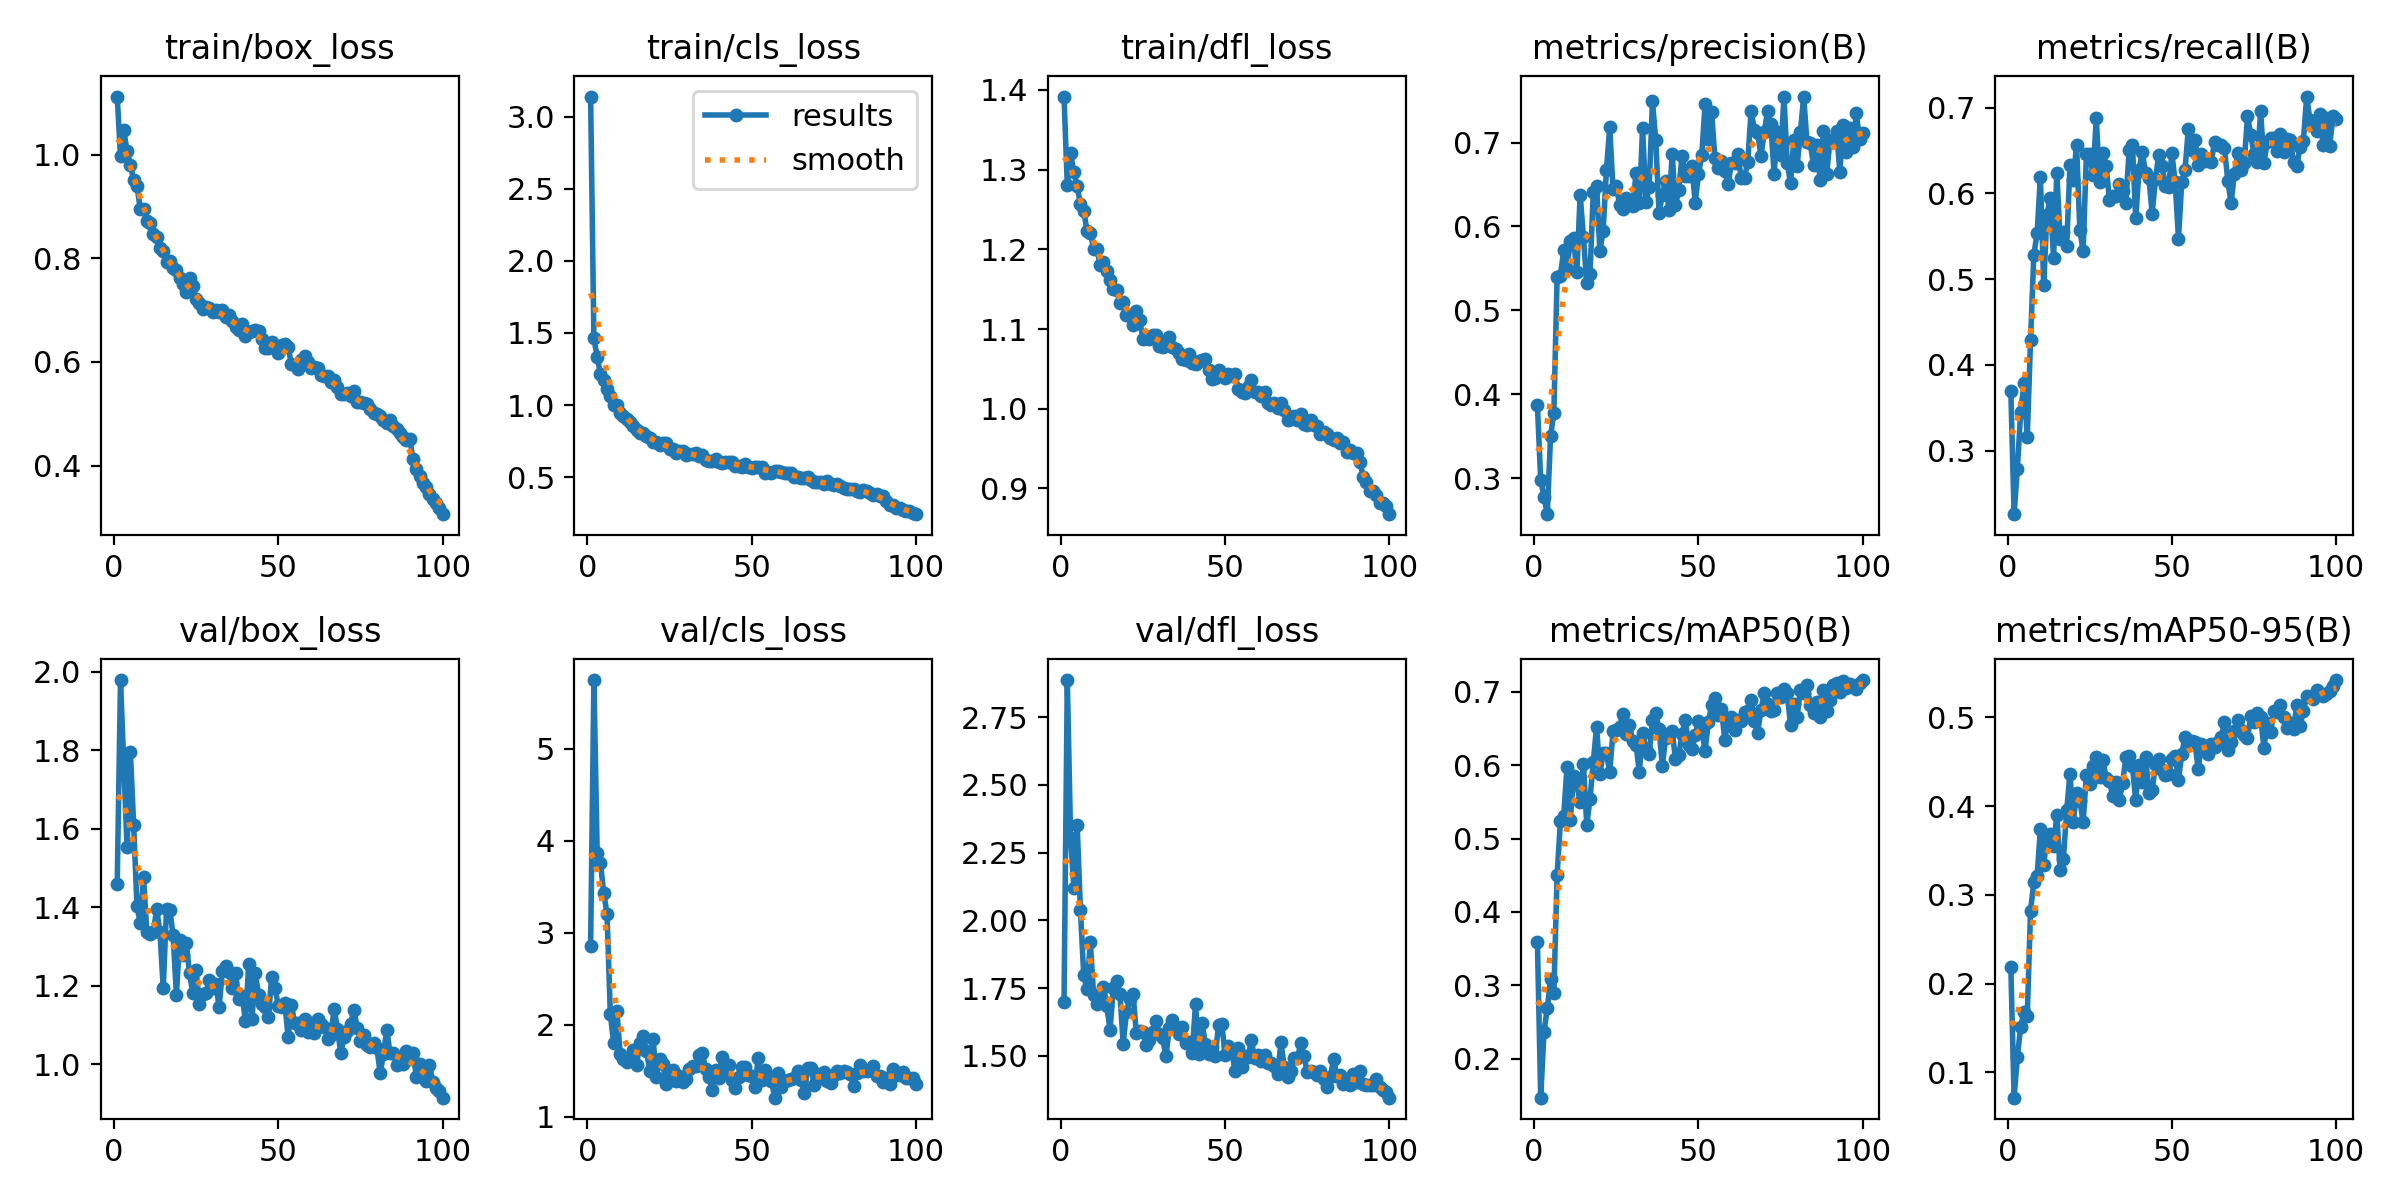

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
# prompt: put a folder from files on colab to google drive

import shutil

# Source folder path in Colab environment
source_folder = '/content/runs'  # Replace with the actual folder name

# Destination folder path in Google Drive
destination_folder = '/content/drive/My Drive/runs'  # Customize the destination path

# Copy the folder
shutil.copytree(source_folder, destination_folder)


'/content/drive/My Drive/runs'